In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Normal Preprocessing

In [4]:
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4909.0,37064.313506,20995.098457,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [8]:
data.drop('id',axis=1,inplace=True)

In [9]:
# checking for categorical data
categorical_columns = data.select_dtypes(include='object').columns

In [10]:
type(categorical_columns)

pandas.core.indexes.base.Index

In [11]:
encoder = LabelEncoder()

for columns in categorical_columns:
    data[columns] = encoder.fit_transform(data[columns])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


In [13]:
X = data.drop("stroke",axis=1)
y = data[['stroke']]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)

<AxesSubplot:ylabel='stroke'>

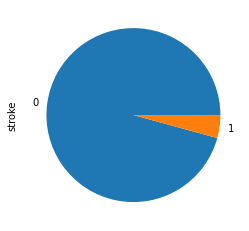

In [15]:
data.stroke.value_counts().plot(kind='pie')

Handling Missing Datasets:
-->Resample the Dataset

**1. OverSample Minority Class**

**2. Downsample Majority Class**

**3. SMOTE - Synthetic Minority Over Sampling Technique**

Instead of using copies of observations to oversample, SMOTE varies attributes of the observations to create new synthetic samples.

In [ ]:
! pip install imblearn

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

<AxesSubplot:ylabel='None'>

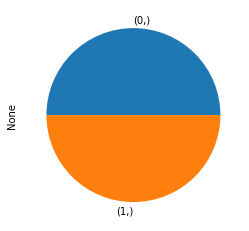

In [19]:
y_train.value_counts().plot(kind='pie')

# Using PyCaret

In [20]:
!pip install -q -U --pre pycaret


In [22]:
import pycaret

In [23]:
# load dataset
from pycaret.datasets import get_data
# init setup
from pycaret.classification import *
clf1 = setup(data = data, target = 'stroke',fix_imbalance=True)
# compare models
best = compare_models(exclude=['dummy'])

,Description,Value
0,Session id,5577
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4909, 11)"
4,Transformed data shape,"(8053, 11)"
5,Transformed train set shape,"(6580, 11)"
6,Transformed test set shape,"(1473, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9540,0.8159,0.0619,0.3306,0.0984,0.0864,0.1215,0.9500
rf,Random Forest Classifier,0.9534,0.7908,0.0552,0.2267,0.0866,0.0742,0.0944,1.2790
lightgbm,Light Gradient Boosting Machine,0.9517,0.8077,0.0619,0.2315,0.0935,0.0787,0.0989,0.4310
ada,Ada Boost Classifier,0.9491,0.8223,0.0624,0.1744,0.0912,0.0728,0.0828,0.6390
et,Extra Trees Classifier,0.9491,0.7702,0.0481,0.1608,0.0717,0.0542,0.0652,0.4710
xgboost,Extreme Gradient Boosting,0.9491,0.7813,0.1100,0.2469,0.1486,0.1281,0.1403,0.5620
dt,Decision Tree Classifier,0.9136,0.5451,0.1424,0.1157,0.1272,0.0833,0.0835,0.1960
knn,K Neighbors Classifier,0.8102,0.7030,0.4867,0.1105,0.1798,0.1188,0.1612,0.1510
lr,Logistic Regression,0.7564,0.8476,0.7590,0.1213,0.2089,0.1465,0.2353,0.5680
qda,Quadratic Discriminant Analysis,0.7549,0.8258,0.7114,0.1144,0.1969,0.1337,0.2141,0.2000


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [41]:
randomforest = create_model('rf' , cross_validation = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.7384,0.0000,0.0000,0.0000,-0.0147,-0.0200
1,0.9535,0.8145,0.0000,0.0000,0.0000,-0.0055,-0.0115
2,0.9448,0.7826,0.0000,0.0000,0.0000,-0.0187,-0.0232
3,0.9506,0.7913,0.0000,0.0000,0.0000,-0.0104,-0.0163
4,0.9448,0.8405,0.0667,0.1667,0.0952,0.0721,0.0803
5,0.9564,0.8461,0.1333,0.5000,0.2105,0.1958,0.2424
6,0.9563,0.7830,0.1429,0.4000,0.2105,0.1932,0.2208
7,0.9592,0.7804,0.0714,0.5000,0.1250,0.1160,0.1777
8,0.9563,0.7398,0.0000,0.0000,0.0000,-0.0055,-0.0112


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

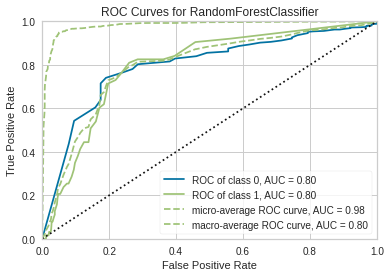

In [38]:
plot_model(randomforest, plot = 'auc')